In [1]:
!nvidia-smi


Wed Feb  4 07:34:14 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install --upgrade diffusers[torch]
!pip install transformers accelerate


In [3]:
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
pipeline.to("cuda")


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.36.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
import random
import os

os.makedirs('/content/faces/happy', exist_ok=True)
os.makedirs('/content/faces/sad', exist_ok=True)
os.makedirs('/content/faces/angry', exist_ok=True)
os.makedirs('/content/faces/surprised', exist_ok=True)

ethnicities = [
    'a latino', 'a white', 'a black',
    'a middle eastern', 'an indian', 'an asian'
]

genders = ['male', 'female']

emotion_prompts = {
    'happy': 'smiling',
    'sad': 'frowning, sad face expression, crying',
    'surprised': 'surprised, opened mouth, raised eyebrows',
    'angry': 'angry'
}


  0%|          | 0/27 [00:00<?, ?it/s]

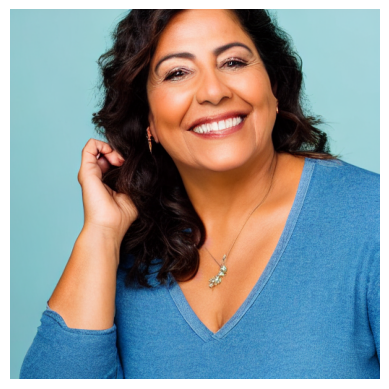

  0%|          | 0/27 [00:00<?, ?it/s]

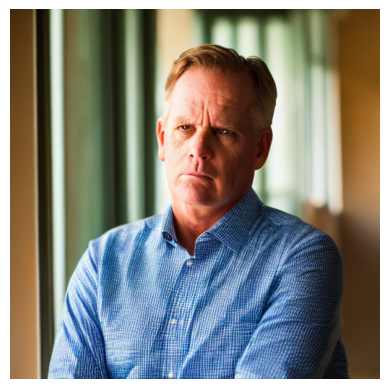

  0%|          | 0/27 [00:00<?, ?it/s]

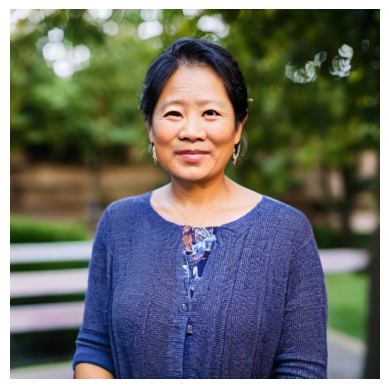

  0%|          | 0/27 [00:00<?, ?it/s]

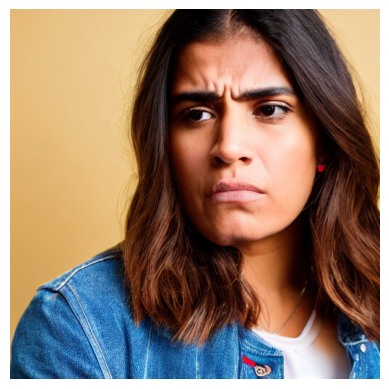

  0%|          | 0/27 [00:00<?, ?it/s]

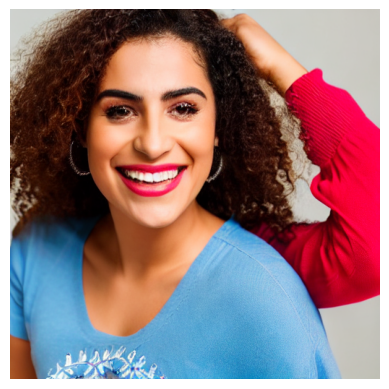

  0%|          | 0/27 [00:00<?, ?it/s]

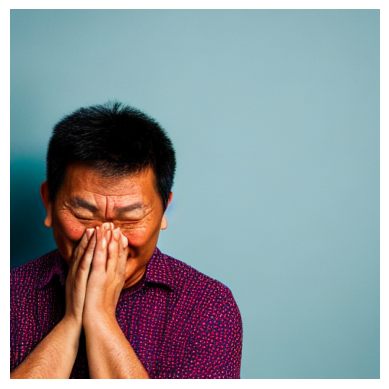

  0%|          | 0/27 [00:00<?, ?it/s]

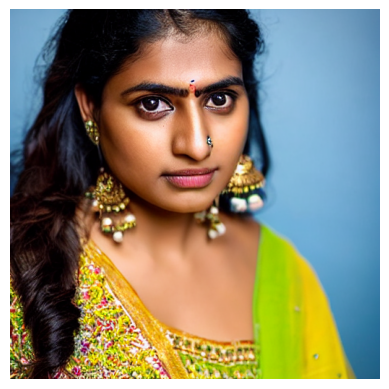

  0%|          | 0/27 [00:00<?, ?it/s]

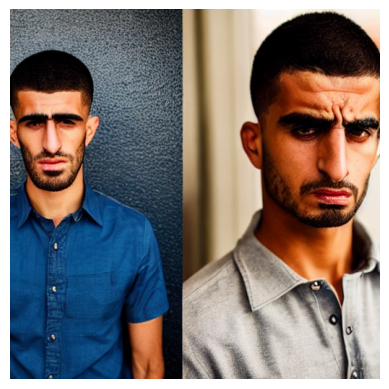

In [5]:
import random
import os
import matplotlib.pyplot as plt
import torch

camera_angles = [
    "front view",
    "slight left angle",
    "slight right angle"
]

lighting = [
    "soft natural lighting",
    "studio lighting",
    "dramatic lighting"
]

ages = [
    "young adult",
    "middle aged"
]

emotion_intensity = {
    "happy": ["slight smile", "big smile, joyful expression"],
    "sad": ["sad expression", "crying, teary eyes"],
    "angry": ["angry", "very angry, clenched jaw"],
    "surprised": ["surprised", "very surprised, wide eyes"]
}

for j in range(2):
    for emotion in emotion_prompts.keys():

        ethnicity = random.choice(ethnicities)
        gender = random.choice(genders)
        age = random.choice(ages)
        camera = random.choice(camera_angles)
        light = random.choice(lighting)
        intensity = random.choice(emotion_intensity[emotion])

        prompt = (
            f"Medium-shot portrait of a {age} {ethnicity} {gender}, "
            f"{intensity}, {camera}, looking at the camera, "
            f"{light}, color photography, photorealistic, "
            "realistic, crisp focus, depth of field, 50mm"
        )

        negative_prompt = (
            "3d, cartoon, anime, sketches, worst quality, low quality, "
            "lowres, monochrome, grayscale, plastic, fake, "
            "disfigured, deformed, blurry, bad anatomy, "
            "watermark, grainy, signature"
        )

        generator = torch.Generator(device="cuda").manual_seed(
            random.randint(0, 10_000)
        )

        img = pipeline(
            prompt,
            negative_prompt=negative_prompt,
            num_inference_steps=27,
            generator=generator
        ).images[0]

        img.save(f"/content/faces/{emotion}/{str(j).zfill(4)}.png")

        plt.imshow(img)
        plt.axis("off")
        plt.show()


In [7]:
!zip -r faces.zip /content/faces


updating: content/faces/ (stored 0%)
updating: content/faces/sad/ (stored 0%)
updating: content/faces/sad/0000.png (deflated 0%)
updating: content/faces/sad/0001.png (deflated 0%)
updating: content/faces/surprised/ (stored 0%)
updating: content/faces/surprised/0000.png (deflated 0%)
updating: content/faces/surprised/0001.png (deflated 0%)
updating: content/faces/happy/ (stored 0%)
updating: content/faces/happy/0000.png (deflated 0%)
updating: content/faces/happy/0001.png (deflated 0%)
updating: content/faces/angry/ (stored 0%)
updating: content/faces/angry/0000.png (deflated 0%)
updating: content/faces/angry/0001.png (deflated 0%)


In [ ]:
# !mkdir -p "/content/gdrive/My Drive/SyntheticDatasetFaceGenerationStableDiffusion"
# !cp faces.zip "/content/gdrive/My Drive/SyntheticDatasetFaceGenerationStableDiffusion/faces.zip"
